# デルタ分布の理解を深めるための演習

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## デルタ分布の性質
1. $\delta(x = 0)$の時、$\infty$が得られる。それ以外は0
2. $\delta(x = 0)$は積分すると、面積(確率)は1となる

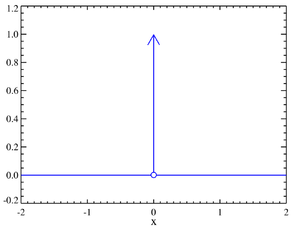

### 例：）以下の式を満たす$\hat{P}^N_{data}(x)$をグラフとして表示するPythonコードを書け。
この時、x = 3
経験分布からは[1, 3, 4, 5, 2, 3, 0, 3]が得られたとし、N = 8とする
$$
\hat{P}^N_{data}(x) = \frac{1}{N}\sum_{i = 1}^{N}\delta(x - xi)
$$

[0, 0, 0, 0.125, 0, 0]


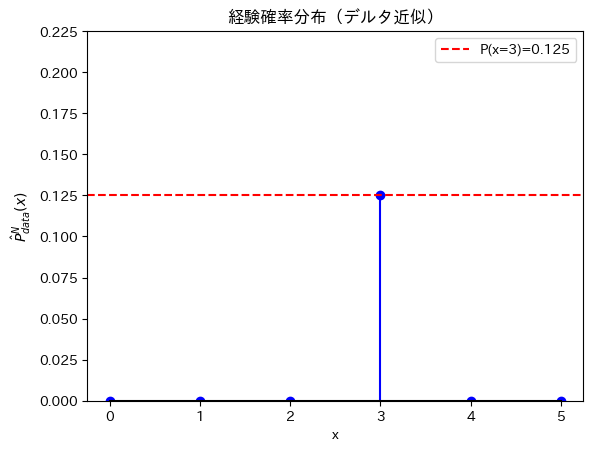

In [9]:
# 経験分布データ
samples = [1, 3, 4, 5, 2, 3, 0, 3]
N = len(samples)  # N = 8
x_target = 3

# x 軸の範囲を決定
x_values = np.arange(min(samples), max(samples) + 1, 1)

# デルタ分布の近似
def delta_approx(xi):
    if x_target - xi == 0:
        return 1
    else:
        return 0

# 各 x に対する確率を計算
probabirty = sum([delta_approx(xi) for xi in x_values]) / N

y_values = np.zeros_like(x_values)
y_values = [probabirty if x_target == xi else 0 for xi in x_values]

print(y_values)
# グラフの描画
plt.stem(x_values, y_values, basefmt="k", linefmt="b", markerfmt="bo")
plt.xlabel("x")
plt.ylabel(r"$\hat{P}^N_{data}(x)$")
plt.title("経験確率分布（デルタ近似）")
plt.xticks(x_values)
plt.ylim(0, max(y_values) + 0.1)

# x=3 の確率を表示
plt.axhline(y=probabirty, color='r', linestyle='--', label=f'P(x=3)={probabirty}')
plt.legend()

plt.show()
